<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Ayudant%C3%ADas/A2/Desarrollo/A2_02_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com



## Sección 1
En esta sección seguiremos explorando los vuelos desde los aeropuertos de NY durante el 2013. En esta ocasión cargaremos los datasets desde el package _nycflights13_.

Para mayor informacíón sobre los datasets disponibles en este package  refiérase al iguiente link 
**https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf**



In [2]:
install.packages("nycflights13")

data("flights", package = "nycflights13") # vuelos
data("weather", package = "nycflights13") # clima

vuelos <- flights
clima <- weather

help(flights)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



librarY## P1. Resumen retrasos 
Genere un resumen de la variable dep_delay del dataset _flights_.

In [7]:
library(dplyr)
summary(vuelos$dep_delay)

# %|>% pipe en R Base
# alt + m : %>%
# alt + - : <-

vuelos %>% select(dep_delay) %>% summary()

#summary(vuelos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -43.00   -5.00   -2.00   12.64   11.00 1301.00    8255 

   dep_delay      
 Min.   : -43.00  
 1st Qu.:  -5.00  
 Median :  -2.00  
 Mean   :  12.64  
 3rd Qu.:  11.00  
 Max.   :1301.00  
 NA's   :8255     

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

## P2. Retrasos por aeropuerto
¿Cuál es el tiempo promedio de retraso de  llegada por cada aeropuerto de origen?

In [9]:
vuelos %>% group_by(dest) %>% 
summarise(promedio_retraso = mean(arr_delay, na.rm = T)) %>% 
ungroup()

dest,promedio_retraso
<chr>,<dbl>
ABQ,4.381890
ACK,4.852273
ALB,14.397129
ANC,-2.500000
ATL,11.300113
AUS,6.019909
AVL,8.003831
BDL,7.048544
BGR,8.027933


## P3. Ubicación de  NA's 

Elimine los registros donde *dep_delay* es NA  y también elimine los registros donde *arr_delay* es NA.

In [32]:
vuelos %>% select(dep_delay, arr_delay) %>% summary()

vuelos_sin_na <- vuelos %>% filter( !is.na(dep_delay) , !is.na(arr_delay))

# comprobacion
vuelos_sin_na %>% select(dep_delay, arr_delay) %>% summary()

   dep_delay         arr_delay       
 Min.   : -43.00   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.: -17.000  
 Median :  -2.00   Median :  -5.000  
 Mean   :  12.64   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:  14.000  
 Max.   :1301.00   Max.   :1272.000  
 NA's   :8255      NA's   :9430      

   dep_delay         arr_delay       
 Min.   : -43.00   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.: -17.000  
 Median :  -2.00   Median :  -5.000  
 Mean   :  12.56   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:  14.000  
 Max.   :1301.00   Max.   :1272.000  

## P4. Vuelos con retrasos 
**a)** Genere un nuevo dataset llamado **vuelos_ret** que contenga todos los registros que tuvieron un  **retraso de salida**. Tenga en cuenta que ya debió tratar los NA's de la pregunta anterior y por ende están considerados en esta etapa.

**b)** Considerando el dataset anterior, ¿cuál es el retraso promedio de salida por aeropuerto de origen?

In [33]:
# a)

vuelos_ret <- vuelos_sin_na %>% filter(dep_delay > 0)

head(vuelos_ret, 1)

# b)

vuelos_ret %>% group_by(origin) %>% summarise(promedio_salida = mean(dep_delay)) %>% ungroup()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00


origin,promedio_salida
<chr>,<dbl>
EWR,38.83913
JFK,37.88509
LGA,41.54964


## P5. Retrasos por dia 
Genere un campo fecha en formato Date (puede utilizar la función as.Date()) que contenga la fecha del vuelo en formato "yyyy-mm-dd".

**a)** Una vez generado este nuevo campo, genere un gráfico que permita visualizar el retraso **promedio** de salida (*dep_delay*), por cada día. Por ejemplo, un gráfico de líneas.

**b)** Considerando el gráfico anterior, añada una curva de tendencia y determine (visualmente) si exsten meses con un alza notoria en relación a los retrasos de los vuelos.


[1] 327346     20

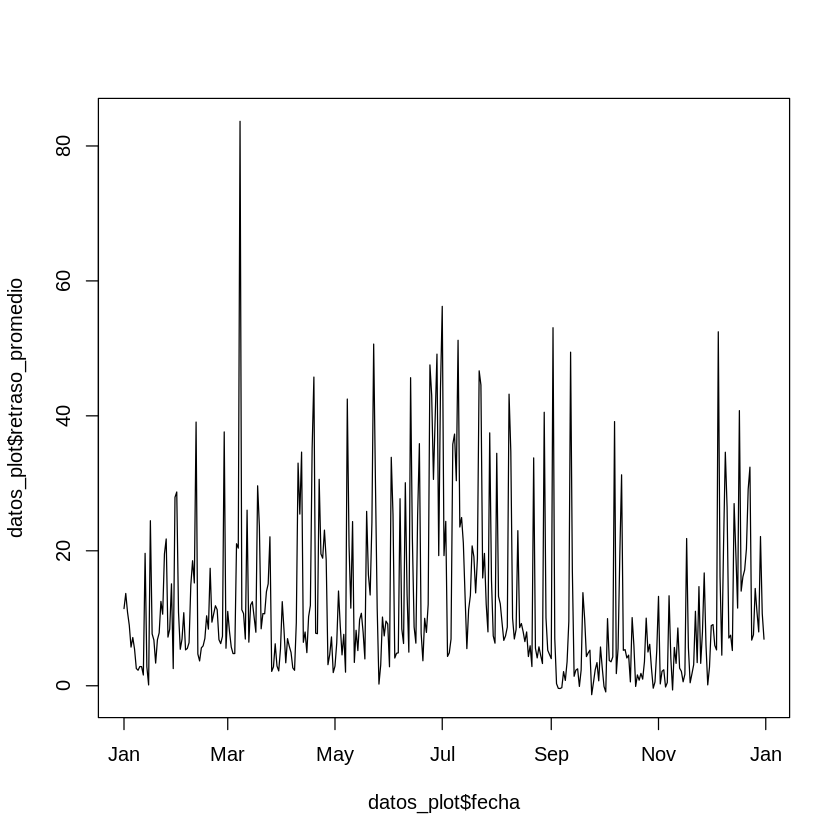


Call:
lm(formula = retraso_promedio ~ fecha, data = datos_plot)

Coefficients:
(Intercept)        fecha  
 130.144375    -0.007395  


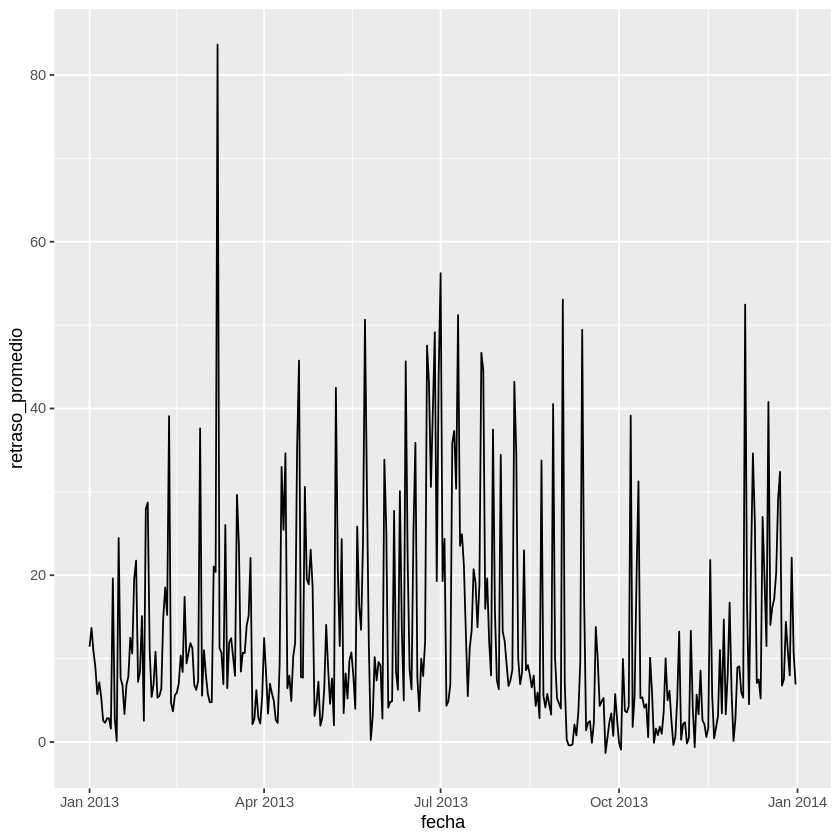

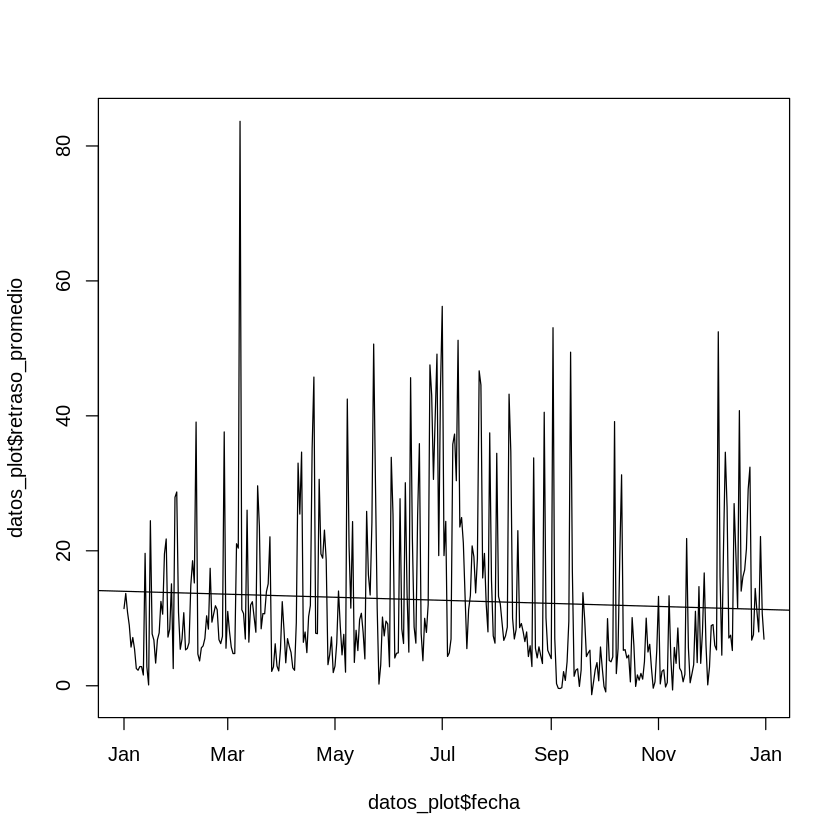

In [44]:


vuelos_sin_na <- vuelos_sin_na %>% mutate(fecha = as.Date(paste(year, month, day, sep =  "-"))) 

# a)   

datos_plot <- vuelos_sin_na %>% group_by(fecha) %>% summarise( retraso_promedio = mean(dep_delay)) %>% ungroup()
dim(vuelos_sin_na)

# Opcion fea
plot(x = datos_plot$fecha, y = datos_plot$retraso_promedio, type = "l"  )

# Opcion bonita
library(ggplot2)

ggplot(datos_plot, aes(x = fecha, y = retraso_promedio)) + geom_line()


# Ejemplo 

#datos_plot_ejemplo <- vuelos_sin_na %>% group_by(fecha, origin) %>% summarise( retraso_promedio = mean(dep_delay)) %>% ungroup()

#head(datos_plot_ejemplo)
#datos_plot_ejemplo %>% filter(origin == "EWR") %>% 
#ggplot( aes(x = fecha, y = retraso_promedio, color = origin)) + geom_line()


# b) 

# regresion lineal  y = mx + n      -> lm(y ~ x)

model_lineal <- lm(retraso_promedio ~ fecha, data = datos_plot)


#lm(datos_plot$retraso_promedio ~ datos_plot$fecha)
plot(x = datos_plot$fecha, y = datos_plot$retraso_promedio, type = "l"  )
abline(a = 130.144375, b = -0.007395 )



## P6. Cruce con clima 
Se tiene la hipótesis de que el clima puede ser un factor importante en los retrasos, para ello cargue el dataset llamado "weather" del package "nycflights13"

**a)** Genere un dataset llamado *vuelos_ret_ampliado* que incluya tanto la información de los vuelos como del clima. (el match debe hacerse por "year","month","day","origin","time_hour").

In [64]:
head(clima,1)
head(vuelos_ret_ampliado, 1)


vuelos_ret_ampliado <- vuelos_sin_na %>% inner_join(clima, by = c("origin", "year", "month", "day", "time_hour"))

#vuelos_ret_ampliado_2 <- vuelos %>% inner_join(clima, by = c("origin", "time_hour"))


origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012,10,2013-01-01 01:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,arr_delay_alto
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,0


## P7. Retrasos 15 min

Cree una columna de **tipo int** llamada *arr_delay_alto*, que tome el valor 1 si el retraso de llegada es mayor o igual a 15 min y 0 en caso contrario. De ahora en adelante diremos que esta columna indica si existió un _retraso alto_ o no.

In [65]:
vuelos_ret_ampliado <- vuelos_ret_ampliado %>% mutate(arr_delay_alto = ifelse(test = arr_delay >= 15, yes =  1, no = 0))
head(vuelos_ret_ampliado,1)



year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,arr_delay_alto
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,0


## P8. Clima según retraso alto (4P)
    
**a)** ¿Cuál es la visibilidad (visib) promedio por tipo de retraso (alto y no alto)?

**b)** ¿Cuál es el valor de la precipitacion (precip) media por tipo de retraso (alto y no alto)?

**c)** ¿Cuál es el valor promedio de wind_gust (vientos fuertes)  por tipo de retraso?

**d)** ¿Qué se observa a partir del resumen anterior?

In [70]:
# a)

vuelos_ret_ampliado %>% group_by(arr_delay_alto) %>% summarise(promedio_visib = mean(visib)) %>% ungroup()

# b)

vuelos_ret_ampliado %>% group_by(arr_delay_alto) %>% summarise(promedio_precip = mean(precip)) %>% ungroup()

# c)

vuelos_ret_ampliado %>% group_by(arr_delay_alto) %>% summarise(promedio_wind_gust  = mean(wind_gust, na.rm = T)) %>% ungroup()


arr_delay_alto,promedio_visib
<dbl>,<dbl>
0,9.432747
1,8.847680


arr_delay_alto,promedio_precip
<dbl>,<dbl>
0,0.002560989
1,0.009318170


arr_delay_alto,promedio_wind_gust
<dbl>,<dbl>
0,24.95442
1,25.68609


 ## P9. Tasa de retrasos (2P)
**a)** ¿Cuál es el aeropuerto de destino con mayor tasa de retrasos altos (arr_delay_alto) ? 

**b)** ¿Cuál es el mes con mayor tasa de retrasos altos?

In [77]:
# a)

vuelos_ret_ampliado %>% 
group_by(dest) %>% summarise( tasa_retrasos = sum(arr_delay_alto)/length(arr_delay_alto)) %>% ungroup() %>% 
arrange(desc(tasa_retrasos)) %>% head(1)

vuelos_ret_ampliado %>% 
group_by(dest) %>% summarise( tasa_retrasos = sum(arr_delay_alto)/n()) %>% ungroup() %>% 
arrange(desc(tasa_retrasos)) %>% head(1)


# b)
vuelos_ret_ampliado %>% 
group_by(month) %>% summarise( tasa_retrasos = sum(arr_delay_alto)/n()) %>% ungroup() %>% 
arrange(desc(tasa_retrasos)) %>% head(1)


dest,tasa_retrasos
<chr>,<dbl>
CAE,0.6346154


dest,tasa_retrasos
<chr>,<dbl>
CAE,0.6346154


month,tasa_retrasos
<int>,<dbl>
12,0.337917
